<h1 style="font-family:Verdana;">
    <center>World Happiness Report</center>
</h1>
<span style="font-family:cursive; color:green; font-size:17px;"><center>be kind</center></span>

<hr>

<p style="font-family:Verdana; word-spacing:1.5px">In this notebook, we are going to explore the <span style="color:crimson;">WHR (World Happiness Report)</span> and find out different factors affecting the happiness of people in different countries. We will use plotly visualizations for a better understanding of our findings. So, without any further ado, lets begin:</p>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
import cufflinks 
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
plt.style.use('fivethirtyeight')



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<h1 id='loading' style='font-family:Verdana;'>
    Loading Data
    <a class="anchor-link" href="#loading">¶</a>
</h1>

In [ ]:
data_15 = pd.read_csv('../input/world-happiness/2015.csv')
data_16 = pd.read_csv('../input/world-happiness/2016.csv')
data_17 = pd.read_csv('../input/world-happiness/2017.csv')
data_18 = pd.read_csv('../input/world-happiness/2018.csv')
data_19 = pd.read_csv('../input/world-happiness/2019.csv')

In [ ]:
data_19.sample(n=3)

In [ ]:
data_19.describe()

In [ ]:
data_19.info()

In [ ]:
list(data_19.columns)

In [ ]:
data_19.rename(columns={'Country or region':'Country', 'Freedom to make life choices':'Freedom'}, inplace=True)
data_18.rename(columns={'Country or region':'Country', 'Freedom to make life choices':'Freedom'}, inplace=True)
data_17.rename(columns={'Happiness.Rank':'Overall rank', 'Happiness.Score':'Score',
                       'Economy..GDP.per.Capita.':'GDP per capita', 'Health..Life.Expectancy.':'Healthy life expectancy',
                       'Trust..Government.Corruption.':'Percenptions of corruption'}, inplace=True)
data_16.rename(columns={'Happiness Rank':'Overall rank', 'Happiness Score':'Score',
                       'Economy (GDP per Capita)':'GDP per capita', 'Health (Life Expectancy)':'Healthy life expectancy',
                       'Trust (Government Corruption)':'Percenptions of corruption'}, inplace=True)
data_15.rename(columns={'Happiness Rank':'Overall rank', 'Happiness Score':'Score',
                       'Economy (GDP per Capita)':'GDP per capita', 'Health (Life Expectancy)':'Healthy life expectancy',
                       'Trust (Government Corruption)':'Percenptions of corruption'}, inplace=True)

In [ ]:
data_19.groupby('Country')['Overall rank']\
.sum().sort_values(ascending=True).to_frame().reset_index().head(20)\
.style.set_properties(**{'background-color':'orange', 'color':'white', 'border-color':'white'}, subset=['Overall rank'])\
.set_properties(**{'background-color':'crimson', 'color':'white', 'border-color':'white'}, subset=['Country'])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;"><i>Finland</i> is often ranked number one for being the happiest country in the world, as the Finns have high incomes, health care for all, and a top education system. Finland is famous for it's stunning Lapland, the northern lights, Saunas, wife carrying, quirky food and for being the home of Santa Claus.
</p>
</div>

<h1 id='top10' style='font-family:Verdana;'>
    Top 10 Countries Year Wise
    <a class="anchor-link" href="#top10">¶</a>
</h1>

In [ ]:
top19 = data_19.groupby('Country')['Score'].sum().sort_values(ascending=False).to_frame().reset_index().head(10)
top18 = data_18.groupby('Country')['Score'].sum().sort_values(ascending=False).to_frame().reset_index().head(10)
top17 = data_17.groupby('Country')['Score'].sum().sort_values(ascending=False).to_frame().reset_index().head(10)
top16 = data_16.groupby('Country')['Score'].sum().sort_values(ascending=False).to_frame().reset_index().head(10)
top15 = data_15.groupby('Country')['Score'].sum().sort_values(ascending=False).to_frame().reset_index().head(10)

In [ ]:
# f, axes = plt.subplots(3, 2, figsize=(17,17), sharex=False)

# fig_15 = sb.barplot(x='Country', y='Score', data=top15, ax=axes[0,0])
# fig_15.set_xticklabels(fig_15.get_xticklabels(), rotation=45)
# fig_15.set_title('2015')

# fig_16 = sb.barplot(x='Country', y='Score', data=top16, ax=axes[0,1])
# fig_16.set_xticklabels(fig_16.get_xticklabels(), rotation=45)
# fig_16.set_title('2016')

# fig_17 = sb.barplot(x='Country', y='Score', data=top17, ax=axes[1,0])
# fig_17.set_xticklabels(fig_17.get_xticklabels(), rotation=45)
# fig_17.set_title('2017')

# fig_18 = sb.barplot(x='Country', y='Score', data=top18, ax=axes[1,1])
# fig_18.set_xticklabels(fig_18.get_xticklabels(), rotation=45)
# fig_18.set_title('2018')

# fig_19 = sb.barplot(x='Country', y='Score', data=top19, ax=axes[2,0])
# fig_19.set_xticklabels(fig_19.get_xticklabels(), rotation=45)
# fig_19.set_title('2019')

# f.tight_layout()

In [ ]:
fig = make_subplots(rows=3, cols=2, subplot_titles=('Year 2015', 'Year 2016', 'Year 2017', 'Year 2018', 'Year 2019'), vertical_spacing=0.1)

fig.add_trace(go.Bar(x=top15['Country'], y=top15['Score'], name='Year 2015'), row=1, col=1)

fig.add_trace(go.Bar(x=top16['Country'], y=top16['Score'], name='Year 2016'), row=1, col=2)

fig.add_trace(go.Bar(x=top17['Country'], y=top17['Score'], name='Year 2017'), row=2, col=1)

fig.add_trace(go.Bar(x=top18['Country'], y=top18['Score'], name='Year 2018'), row=2, col=2)

fig.add_trace(go.Bar(x=top19['Country'], y=top19['Score'], name='Year 2019'), row=3, col=1,)

fig.update_layout(height=1350, template='ggplot2', showlegend=False, title='Top 10 Countries with Happiest People')

<p style="font-family:verdana;">Finland jumped to rank one after year 2017 with highest happiness score among all the countries in the world. We can also see Switzerland slipping down the slope since 2015.</p>

<h1 id='gdp' style='font-family:Verdana;'>
    GDP per capita
    <a class="anchor-link" href="#gdp">¶</a>
</h1>

In [ ]:
# data_15[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)\
# .iplot(x='Country', y='GDP per capita',
#        kind='bar', color='red',
#        title='GDP/capita 2015 top 20 Countries', xTitle='Country',
#        yTitle='GDP per capita')

# data_16[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)\
# .iplot(x='Country', y='GDP per capita',
#        kind='bar', color='green',
#        title='GDP/capita 2016 top 20 Countries', xTitle='Country',
#        yTitle='GDP per capita')

# data_17[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)\
# .iplot(x='Country', y='GDP per capita',
#        kind='bar', color='blue',
#        title='GDP/capita 2017 top 20 Countries', xTitle='Country',
#        yTitle='GDP per capita')

# data_18[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)\
# .iplot(x='Country', y='GDP per capita',
#        kind='bar', color='pink',
#        title='GDP/capita 2018 top 20 Countries', xTitle='Country',
#        yTitle='GDP per capita')

# data_19[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)\
# .iplot(x='Country', y='GDP per capita',
#        kind='bar', color='purple',
#        title='GDP/capita 2019 top 20 Countries', xTitle='Country',
#        yTitle='GDP per capita')

In [ ]:
gdp15 = data_15[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)
gdp16 = data_16[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)
gdp17 = data_17[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)
gdp18 = data_18[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)
gdp19 = data_19[['Country', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(20)

In [ ]:
fig = make_subplots(rows=3, cols=2, subplot_titles=('Year 2015', 'Year 2016', 'Year 2017', 'Year 2018', 'Year 2019'))

fig.add_trace(go.Bar(x=gdp15['Country'], y=gdp15['GDP per capita'], name='Year 2015'), row=1, col=1)

fig.add_trace(go.Bar(x=gdp16['Country'], y=gdp16['GDP per capita'], name='Year 2016'), row=1, col=2)

fig.add_trace(go.Bar(x=gdp17['Country'], y=gdp17['GDP per capita'], name='Year 2017'), row=2, col=1)

fig.add_trace(go.Bar(x=gdp18['Country'], y=gdp18['GDP per capita'], name='Year 2018'), row=2, col=2)

fig.add_trace(go.Bar(x=gdp19['Country'], y=gdp19['GDP per capita'], name='Year 2019'), row=3, col=1,)


fig.update_layout(height=1400, template='ggplot2', showlegend=False, title='GDP/Capita of Top 10 Countries')

In [ ]:
data_19[data_19['Country'].isin(['United States'])]

<h1 id='hle' style='font-family:Verdana;'>
    Healthy Life Expectancy
    <a class="anchor-link" href="#hle">¶</a>
</h1>

In [ ]:
data_19[['Country', 'Healthy life expectancy']].sort_values(by='Healthy life expectancy', ascending=False).head(20)\
.style.set_properties(**{'background-color':'crimson', 'color':'white', 'border-color':'white'}, subset=['Country'])\
.set_properties(**{'background-color':'orange', 'color':'white', 'border-color':'white'}, subset=['Healthy life expectancy'])

In [ ]:
data_19[['Country', 'Healthy life expectancy']].iplot(kind='line', x='Country', y='Healthy life expectancy', title='Healthy life expectancy (2019)',
                                                     xTitle='Country', yTitle='HLE')

In [ ]:
hle_20 = data_19[['Country', 'Healthy life expectancy']].sort_values(by='Healthy life expectancy', ascending=False).head(20)
fig = px.scatter(hle_20, 'Country', 'Healthy life expectancy', color='Country', size='Healthy life expectancy')
fig.update_layout(showlegend=False, template='ggplot2', title='Healthy life expectancy in top 20 countries(2019)')

<p style="font-family:verdana;">Lets take a look at the world map of Healthy Life Expectancy. Countries with bigger dots have greater healthy life expectancy and vice-versa.</p>

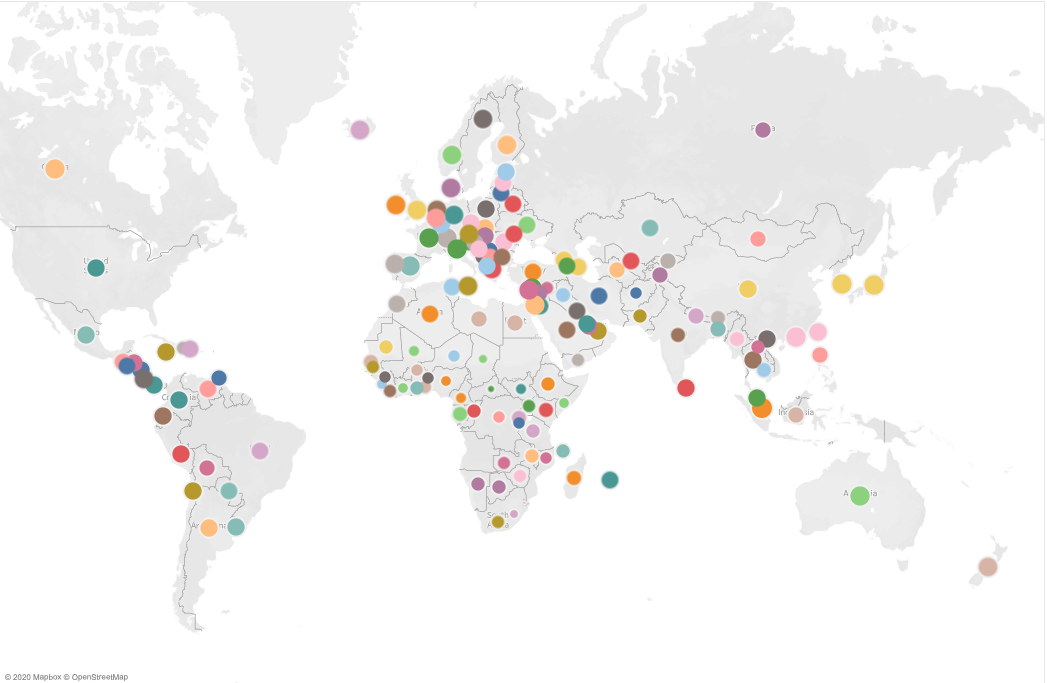

In [ ]:
fig = px.treemap(data_19, path=['Country'], values='Healthy life expectancy', color='Country', hover_data=['Healthy life expectancy'])
fig.update_layout(title='Treemap of HLE 2019')

<p style="font-family:verdana;">Work in progress...</p>